In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 一个用法
def simulate_ecosystem(gender_ratio_variation):
    if gender_ratio_variation == 'equal':
        initial_ratio = 0.5  # 初始雄性比例为 50%
    elif gender_ratio_variation == 'male_dominant':
        initial_ratio = 0.7  # 初始雄性比例为 70%
    elif gender_ratio_variation == 'female_dominant':
        initial_ratio = 0.3  # 初始雄性比例为 30%
    else:
        raise ValueError('Invalid gender ratio variation')

    generations = 50 
    gender_ratio = np.zeros(generations)
    gender_ratio[0] = initial_ratio
    predator_population = np.ones(generations)  # 初始捕食者数量为1
    reproductive_success = np.ones(generations)  # 初始繁殖成功率为1
    food_resources = np.ones(generations)  # 初始食物资源为 1
    parasite_population = np.ones(generations)  # 初始寄生虫数量为 1
    composite_indicator = np.zeros(generations)  # 初始综合指标为 0

    for gen in range(1, generations):
        gender_ratio[gen] = gender_ratio[gen - 1]
        reproductive_success[gen] = reproductive_success[gen - 1] - 0.005 * abs(gender_ratio[gen] - 0.5)
        predator_population[gen] = predator_population[gen - 1] * reproductive_success[gen] 
        food_resources[gen] = food_resources[gen - 1] - 0.02
        parasite_population[gen] = parasite_population[gen - 1] + np.random.normal(loc=0, scale=0.1)
        composite_indicator[gen] = 0.4 * gender_ratio[gen] + 0.3 * predator_population[gen] + \
                                   0.2 * reproductive_success[gen] + 0.1 * food_resources[gen]

    return composite_indicator, parasite_population

# 用法
def evaluate_population(gender_ratio_variation):
    composite_indicator, parasite_population = simulate_ecosystem(gender_ratio_variation)
    
    # 计算其他水生生物的健康程度评定，假设
    other_aquatic_health = 1 - 0.5 * parasite_population
    
    # 可视化结果
    generations = np.arange(50)
    plt.figure(figsize=(12, 8))
    
    # 绘制寄生虫数量变化图
    plt.subplot(2, 1, 1)
    plt.plot(generations, parasite_population, label='Parasite Population', linewidth=2)
    plt.title('Parasite Population Over Generations')
    plt.xlabel('Generations')
    plt.ylabel('Parasite Population')
    plt.legend()
    
    # 绘制其他水生生物健康程度评定图
    plt.subplot(2, 1, 2)
    plt.plot(generations, other_aquatic_health, label='Other Aquatic Health', linewidth=2, color='green')
    plt.title('Other Aquatic Health Over Generations')
    plt.xlabel('Generations')
    plt.ylabel('Other Aquatic Health')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

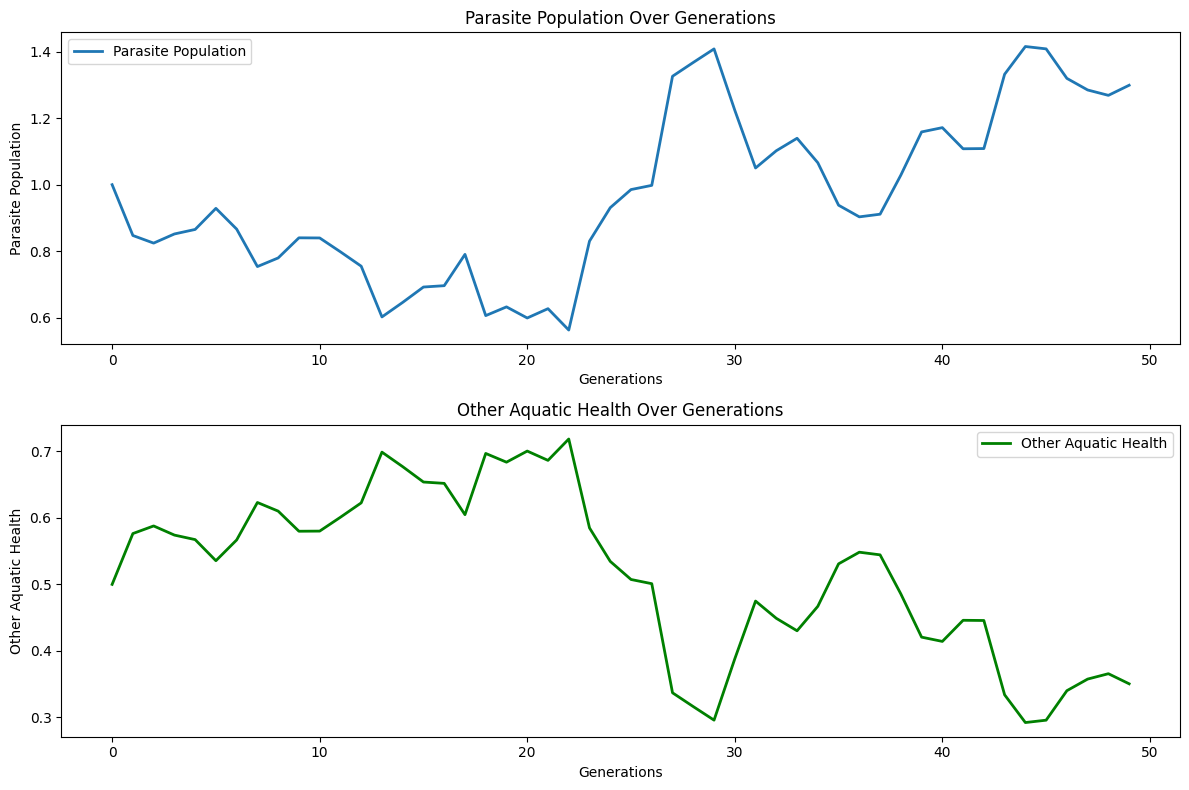

In [7]:
# 运行模拟
evaluate_population('equal')  # 选择合适的性别比例变化情况

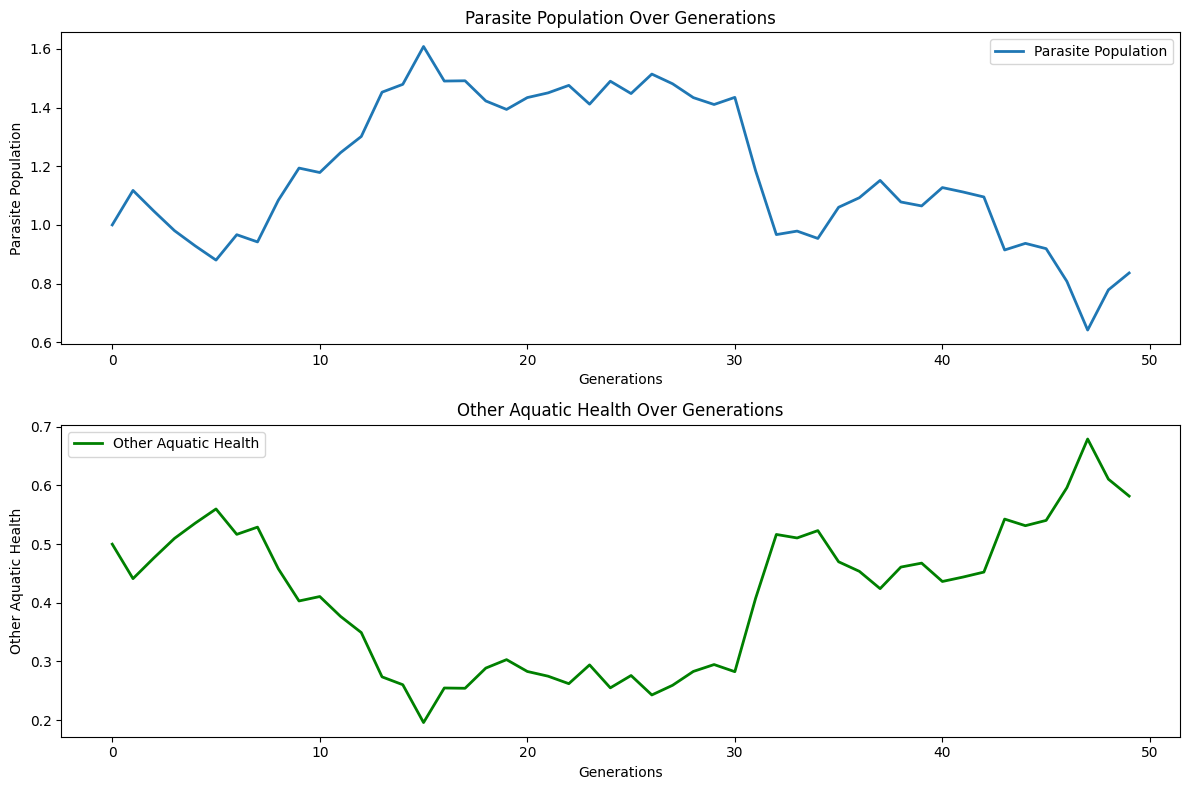

In [8]:
evaluate_population('female_dominant')  # 选择合适的性别比例变化情况

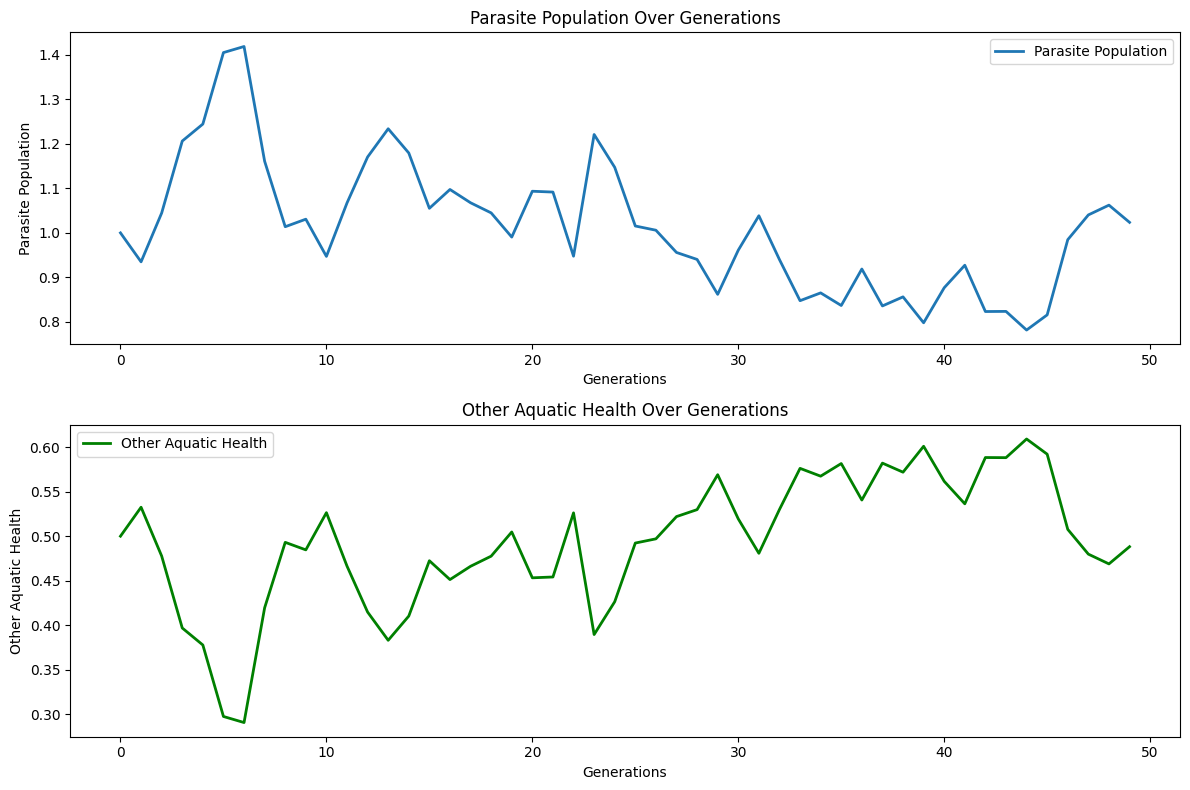

In [9]:
evaluate_population('male_dominant')  # 选择合适的性别比例变化情况
